# ДЗ 4.

### Задача 1

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.



Х - нормально распределенная случайная величина, равная массе коробки с конфетами.

mu = 1.06 - мат. ожидание

sigma  - среднее квадратичное отклонение
$$F(x) = P(X < 1).$$
F(x) = 0.05
Используем функцию Лапласа

Ф((-1.06)/sigma) + 0.5 = 0.05

Ф(0.06/sigma) = 0.45

0.06/sigma = 1.645


In [26]:
sigma = 0.06/1.645
print(f'среднее квадратичное отклонение  {sigma}')

среднее квадратичное отклонение  0.0364741641337386


Вычислим процент коробок, имеющих массу больше 1.1 кг.
P(1.1 < X < бесконечность ) = Ф(бесконечность) - Ф((1.1 - 1.06)/sigma) = 0.5 - Ф(1.097) = 0.5 - 0.362 = 0.138


In [27]:
p = (0.5 - 0.362) * 100
print(f'процент коробок, имеющих массу больше 1.1 кг равен {p} процентов' )

процент коробок, имеющих массу больше 1.1 кг равен 13.8 процентов


### 2 второй вариант с использованием функции распределения F(x) - cdf

In [28]:
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [29]:
mu = 1.06
st = 0
end = 1
p = 0.05
er = 0.0001

print('Cdf\tScale')

while True:
    scale = (st + end) / 2
    cdf = stats.norm.cdf(1, loc = mu, scale = scale)
    print(round(cdf, 4), '\t', round(scale, 4))
    if cdf <= p - er:
        st = scale
    elif cdf >= p + er:
        end = scale
    else:
        break

print('Cреднее квадратичное отклонение scale = ', scale)

Cdf	Scale
0.4522 	 0.5
0.4052 	 0.25
0.3156 	 0.125
0.1685 	 0.0625
0.0274 	 0.0312
0.1003 	 0.0469
0.0623 	 0.0391
0.0439 	 0.0352
0.053 	 0.0371
0.0484 	 0.0361
0.0507 	 0.0366
0.0495 	 0.0364
0.0501 	 0.0365
0.0498 	 0.0364
0.05 	 0.0365
Cреднее квадратичное отклонение scale =  0.036468505859375


In [30]:
stats.norm.cdf(1, loc = mu, scale = scale)

0.049958594078015874

In [31]:
pr = (1 - stats.norm.cdf(1.1, loc = mu, scale = scale)) * 100
print(f'Процент коробок, имеющих массу больше 1.1 кг равен {pr} процентов' )

Процент коробок, имеющих массу больше 1.1 кг равен 13.63563656878326 процентов


### Задача 2

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

Подсказка. Для равномерного распределения в промежутке [a, b]:
1. мат. ожидание равно (a + b) / 2,
2. дисперсия равна (b - a)^2 / 12.

Непрерывная случайная величина X имеет равномерное распределение на отрезке [a,b], если на этом отрезке плотность распределения случайной величины постоянна, а вне его – равна нулю, т.е
Выборку из равномерного распределения можно получить с помощью функции uniform из модуля numpy.random. Построим выборку из равномерного распределения с параметрами  𝑎=12 ,  𝑏=14.

In [32]:
a = 12
b = 14
n = 30
samples = np.random.uniform(a, b, size=30)
print(samples)

[13.11024506 12.280905   13.7521295  13.2295933  12.16202608 13.23226568
 13.61766436 13.46047274 12.62364599 13.77889034 13.36394715 12.41829634
 12.20826592 13.38509233 12.88249271 13.62540345 12.57091856 12.25991797
 12.48380433 13.8065089  12.83978503 12.92401177 13.29234958 12.54682923
 13.55727675 12.28128439 13.93887505 13.71749573 12.57018586 12.15512528]


In [33]:
# m = M(X)- мат. ожидание для равномерного распределения
# d = D(X) - дисперсия для равномерного распределения
m = (a + b) / 2
d = ((b - a) ** 2) / 12
print(f'Мат. ожидание {m}')
print(f'Дисперсия {d}')


Мат. ожидание 13.0
Дисперсия 0.3333333333333333


In [34]:
#Посчитаем выборочное среднее от выборки:
samples.mean()


13.002523479995139

Центральная предельная теорема утверждает: чем больше  𝑛 , тем ближе распределение величины  𝑌  к нормальному распределению с параметрами

𝑎=𝑛⋅𝑀(𝑋), 𝜎2=sqrt(𝑛⋅𝐷(𝑋)).

In [35]:
#Найдем параметры:
mu = n * m
sigma = np.sqrt(n * d)
print(mu)
print(sigma)

390.0
3.1622776601683795


In [36]:
p1 = stats.norm.cdf(390, loc = mu, scale = sigma)
print(f'Вероятность, что масса всей коробки будет: меньше 390 граммов = {p1}')

Вероятность, что масса всей коробки будет: меньше 390 граммов = 0.5


In [37]:
p2 = 1 - stats.norm.cdf(395, loc = mu, scale = sigma)
print(f'Вероятность, что масса всей коробки будет: больше 395 граммов = {p2}')

Вероятность, что масса всей коробки будет: больше 395 граммов = 0.056923149003329065


In [38]:
p3 = stats.norm.cdf(400, loc = mu, scale = sigma) - stats.norm.cdf(380, loc = mu, scale = sigma)
print(f'Вероятность, что масса всей коробки будет: от 380 до 400 граммов = {p3}')

Вероятность, что масса всей коробки будет: от 380 до 400 граммов = 0.9984345977419975


### Задача 3

Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений n (например, 2, 5, 10, 50).
2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения, D - его дисперсия).

При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

Проверим утверждение центральной предельной теоремы на равномерном распределении  𝑋  с параметрами  𝑎=-5 ,  𝑏=5 . Для этого при различных  𝑛  сформируем  𝑛  выборок размера 1000 , а затем посчитаем от них поэлементно среднее. Таким образом, мы получим одну выборку размера  1000


In [39]:
a = -5
b = 5

m = (a + b) / 2
d = ((b - a) ** 2) / 12

n_samples = 1000

In [40]:
def get_mean_samples_uniform(n):
    samples = np.random.uniform(a, b, size=(n, n_samples))
    
    return samples.mean(axis=0)

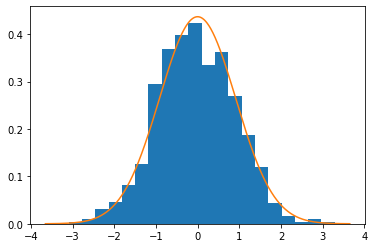

In [41]:
def pdf_normal(loc, scale, x):
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

n = 10

loc = m
scale = np.sqrt(d / n)
samples = get_mean_samples_uniform(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)